In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Training Data.csv')

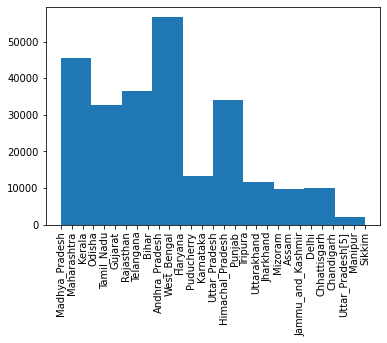

In [15]:
x,y, _ = plt.hist(df.STATE)
plt.xticks(rotation="vertical")
plt.show()

In [16]:
print(x.max())

56670.0
